# Linear Regression Assignment : BoomBikes

#### Problem Statement
BoomBikes - a bike sharing company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

#### Business Goal
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Step 1: Understanding and Reading Data

In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#read csv file 
bikes = pd.read_csv("day.csv")

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
#calculate total null values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#data types
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#change index
bikes = bikes.set_index('instant')

In [8]:
#convert to datetime
bikes['dteday'] = pd.to_datetime(bikes['dteday'], infer_datetime_format=True, format='%d%m%y')
#sns.barplot(data=bikes, x=bikes['dteday'].dt.month, y = 'cnt', hue = bikes['dteday'].dt.year)

In [9]:
#convert categorical columns to category type
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in cat_columns:
    bikes[column] = bikes[column].astype('category')

In [10]:
#verify data types
bikes.dtypes

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Step 2 : Data analysis using visualization 

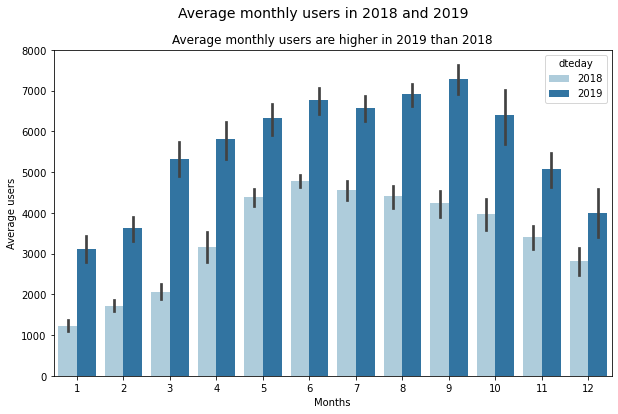

In [11]:
#average monthly users in 2018 and 2019
plt.figure(figsize = (10,6))
sns.set_palette("Paired")
sns.barplot(data=bikes, x='mnth', y = 'cnt', hue = bikes['dteday'].dt.year)
plt.suptitle('Average monthly users in 2018 and 2019', fontsize=14)
plt.title('Average monthly users are higher in 2019 than 2018', fontsize=12)
plt.xlabel('Months')
plt.ylabel('Average users')
plt.show()

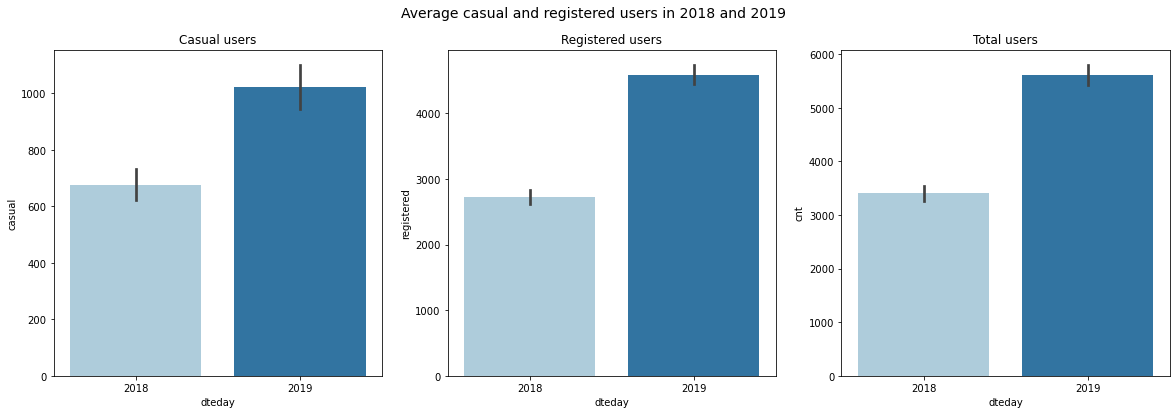

In [12]:
#average number of casual and registered users in 2018 and 2019
plt.figure(figsize=(20, 6))
plt.suptitle('Average casual and registered users in 2018 and 2019', size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x=bikes['dteday'].dt.year, y = 'casual')
plt.title('Casual users')
plt.subplot(1,3,2)
sns.barplot(data=bikes, x=bikes['dteday'].dt.year, y = 'registered')
plt.title('Registered users')
plt.subplot(1,3,3)
sns.barplot(data=bikes, x=bikes['dteday'].dt.year, y = 'cnt')
plt.title('Total users')
plt.show()

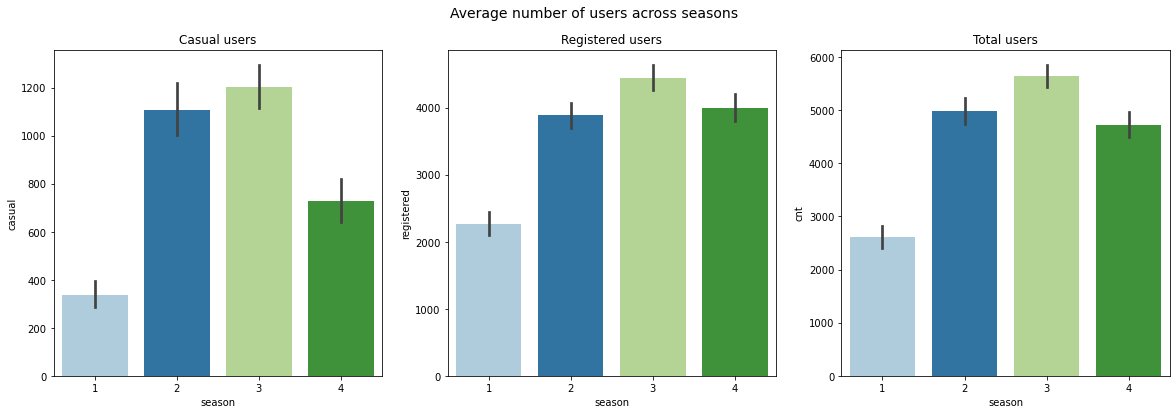

Fall season has a highest number of average daily users


In [13]:
#users across various seasons. 1:spring, 2:summer, 3:fall, 4:winter
plt.figure(figsize=(20, 6))
plt.suptitle('Average number of users across seasons', size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='season', y='casual')
plt.title('Casual users')
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='season', y='registered')
plt.title('Registered users')
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='season', y='cnt')
plt.title('Total users')
plt.show()
print('Fall season has a highest number of average daily users')

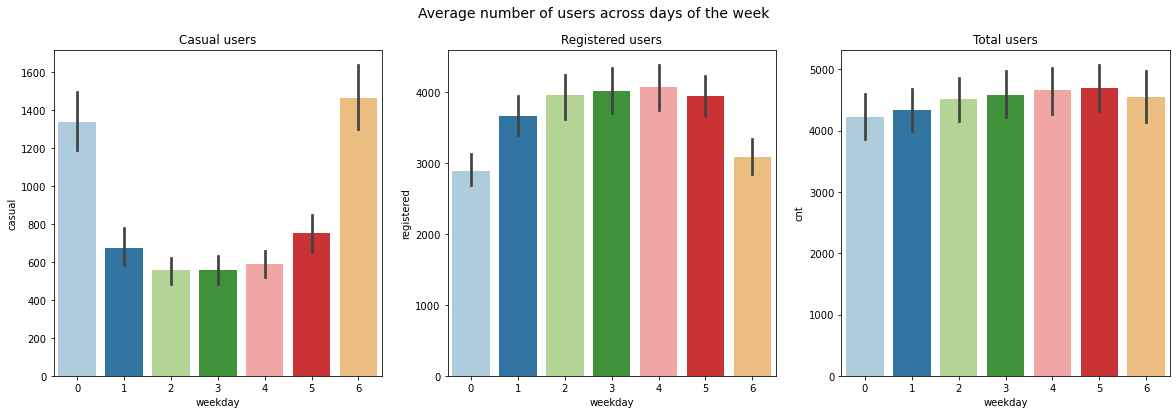

High number of casual users in weekends
High number of registered users in weekdays


In [14]:
#users across days of the week (0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4:Thursday, 5:Friday, 6: Saturday)
plt.figure(figsize=(20, 6))
plt.suptitle("Average number of users across days of the week", size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='weekday', y='casual')
plt.title('Casual users')
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='weekday', y='registered')
plt.title('Registered users')
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='weekday', y='cnt')
plt.title('Total users')
plt.show()
print('High number of casual users in weekends')
print('High number of registered users in weekdays')

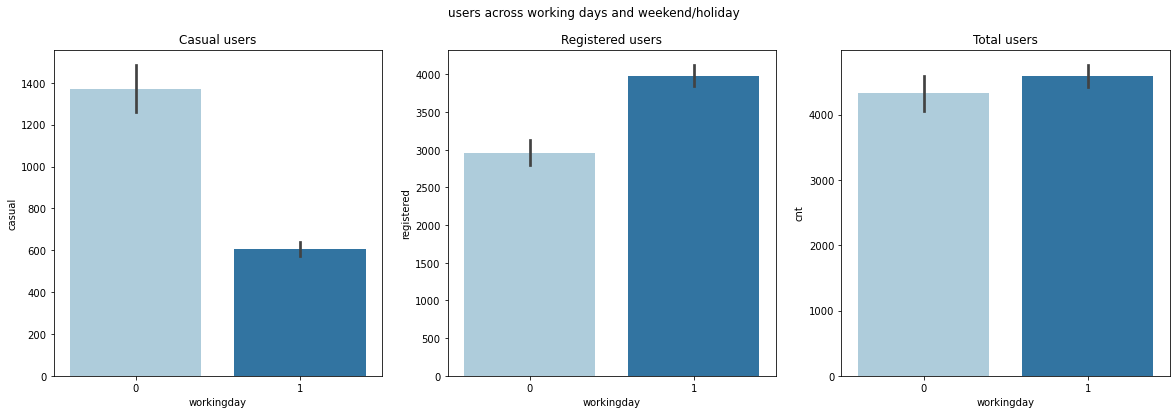

The average number of casual users are high during weekend or holidays
The average number of registered users are high during working days


In [15]:
#users across working days (weekend or holiday: 0, working day: 1)
plt.figure(figsize=(20, 6))
plt.suptitle('users across working days and weekend/holiday')
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='workingday', y='casual')
plt.title("Casual users")
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='workingday', y='registered')
plt.title("Registered users")
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='workingday', y='cnt')
plt.title("Total users")
plt.show()
print('The average number of casual users are high during weekend or holidays')
print('The average number of registered users are high during working days')

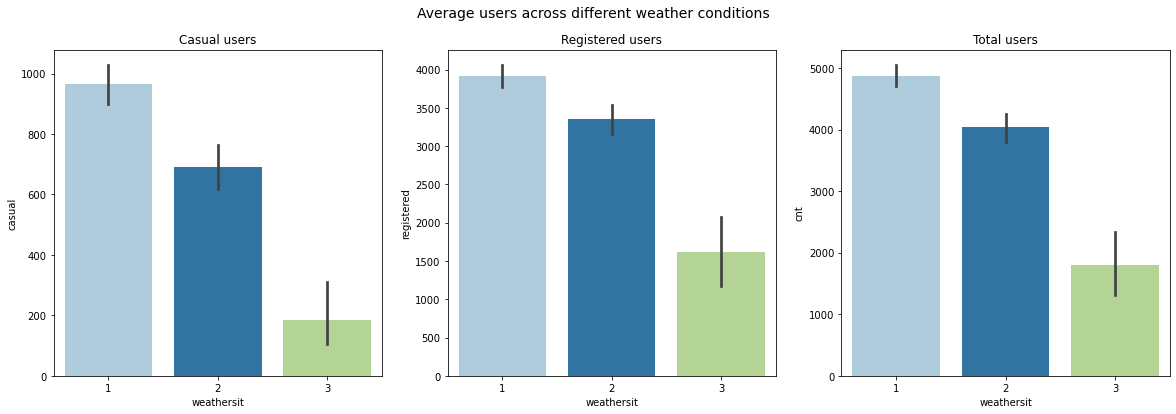

Clear/Pew cloud days has a higher number of users than snow or thunderstorm days


In [16]:
#users across various weather conditions: - 
#1: Clear, Few clouds, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

plt.figure(figsize=(20, 6))
plt.suptitle("Average users across different weather conditions", size=14)
plt.subplot(1,3,1)
sns.barplot(data=bikes, x='weathersit', y='casual')
plt.title("Casual users")
plt.subplot(1,3,2)
sns.barplot(data=bikes, x='weathersit', y='registered')
plt.title("Registered users")
plt.subplot(1,3,3)
sns.barplot(data=bikes, x='weathersit', y='cnt')
plt.title("Total users")
plt.show()
print ('Clear/Pew cloud days has a higher number of users than snow or thunderstorm days')

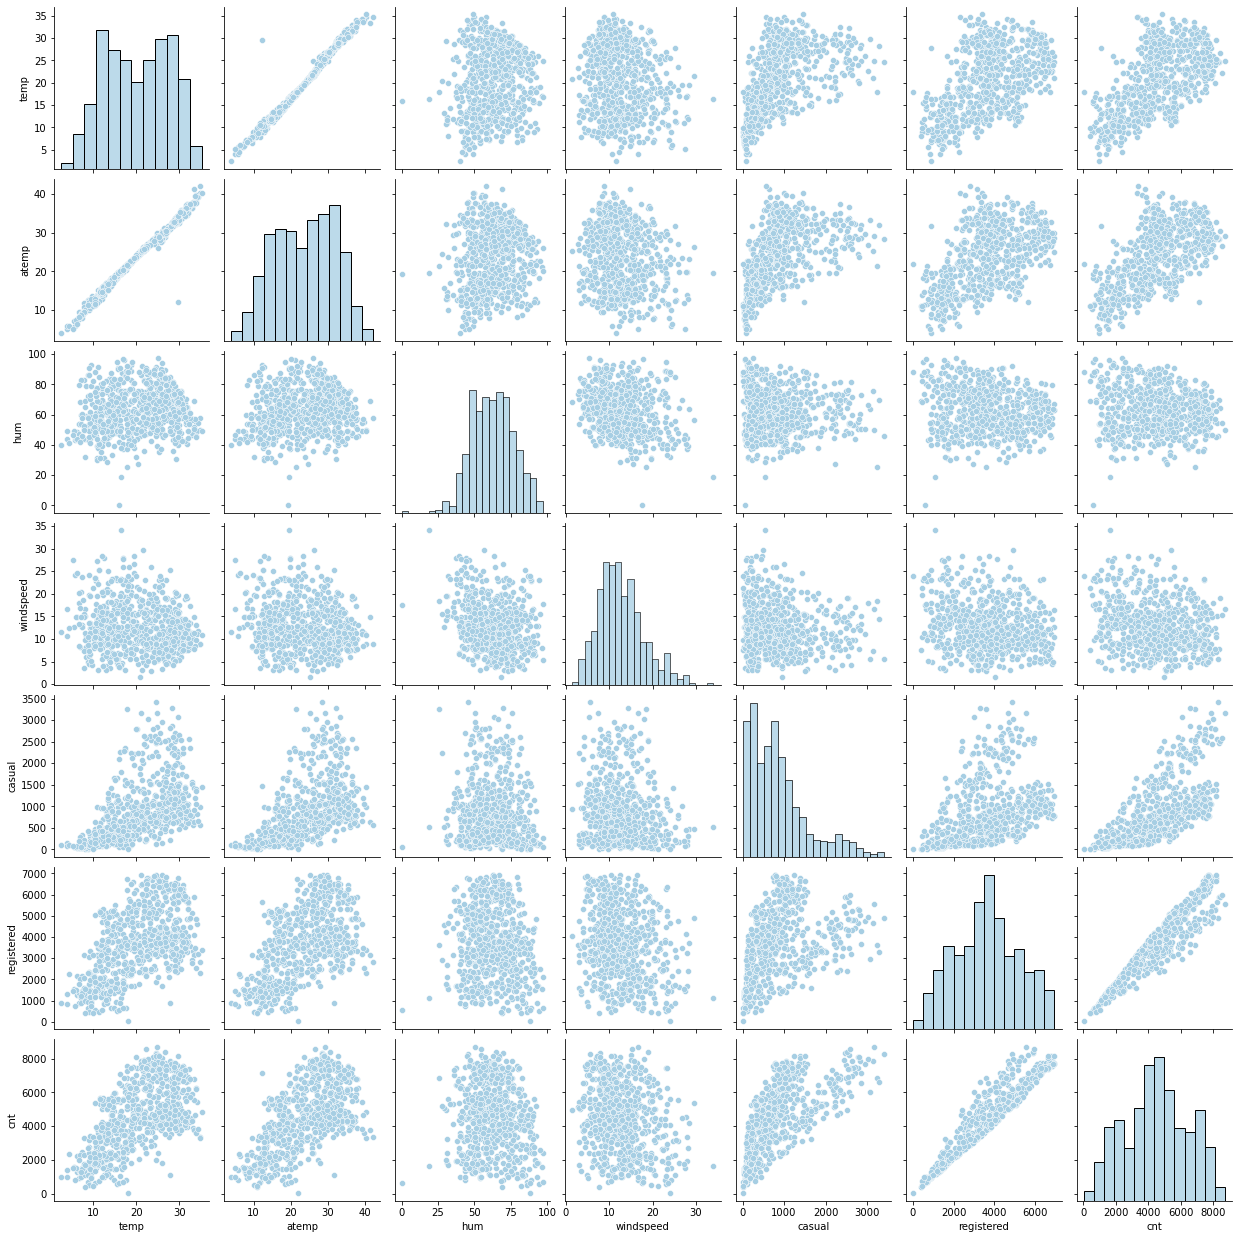

In [17]:
#relationship between all other continous variables
sns.pairplot(bikes)
plt.show()

In [40]:
bikes.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Step 3: Preprocessing Data for Modelling

In [19]:
# building model using cnt (total users) as a target variable
bikes = bikes.drop(columns = {'dteday', 'casual', 'registered'})

In [20]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
#creating x and y
y = bikes['cnt']
X = bikes.drop('cnt', axis=1)

In [22]:
#train-test split
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Step 4: Building a Linear Model

In [23]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [24]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          4.96e-169
Time:                        10:12:58   Log-Likelihood:                -4170.0
No. Observations:                 510   AIC:                             8364.
Df Residuals:                     498   BIC:                             8415.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1629.6353    285.800      5.702      0.000    1068.113    2191.157
season       418.3085     68.958      6.066      0.000     282.824     553.793
yr          2039.3289     78.187     26.083      0.000    1885.712    2192.946
mnth         -14.0457     21.553     -0.652      0.515     -56.392      28.300
holiday     -598.4634    254.102     -2.355      0.019   -1097.707     -99.220
weekday       69.3069     19.457      3.562      0.000      31.078     107.536
workingday   167.9048     85.196      1.971      0.049       0.517     335.293
weathersit  -703.6255     91.178     -7.717      0.000    -882.766    -524.485
temp          57.3536     36.765      1.560      0.119     -14.880     129.588
atemp         63.0542     34.085      1.850      0.065      -3.914     130.022
hum           -8.4065      3.713     -2.264      0.024     -15.701      -1.112
windspeed    -43.8750      7.996     -5.487      0.000     -59.586     -28.164
==============================================================================
Omnibus:                       64.012   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.857
Skew:                          -0.673   Prob(JB):                     1.29e-32
Kurtosis:                       5.258   Cond. No.                         560.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,446.65
7,temp,395.15
9,hum,27.36
0,season,23.88
2,mnth,17.13
6,weathersit,12.62
10,windspeed,5.12
5,workingday,3.16
4,weekday,3.07
1,yr,2.03


In [26]:
X_train = X_train.drop('mnth', axis=1)

In [27]:
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.2
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          4.15e-170
Time:                        10:12:58   Log-Likelihood:                -4170.2
No. Observations:                 510   AIC:                             8362.
Df Residuals:                     499   BIC:                             8409.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1636.0576    285.465      5.731      0.000    1075.196    2196.919
season       380.7312     37.797     10.073      0.000     306.470     454.993
yr          2040.9395     78.103     26.131      0.000    1887.489    2194.390
holiday     -606.0253    253.690     -2.389      0.017   -1104.458    -107.592
weekday       68.5318     19.410      3.531      0.000      30.397     106.667
workingday   169.3736     85.117      1.990      0.047       2.142     336.605
weathersit  -698.7284     90.815     -7.694      0.000    -877.156    -520.301
temp          57.5866     36.742      1.567      0.118     -14.602     129.775
atemp         63.1617     34.065      1.854      0.064      -3.766     130.090
hum           -8.6659      3.689     -2.349      0.019     -15.914      -1.418
windspeed    -43.9377      7.991     -5.498      0.000     -59.638     -28.237
==============================================================================
Omnibus:                       63.196   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.623
Skew:                          -0.666   Prob(JB):                     3.94e-32
Kurtosis:                       5.243   Cond. No.                         557.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,atemp,446.55
6,temp,395.15
8,hum,27.05
5,weathersit,12.54
0,season,7.09
9,windspeed,5.12
4,workingday,3.16
3,weekday,3.06
1,yr,2.03
2,holiday,1.09


In [29]:
X_train = X_train.drop('temp', axis=1)

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.2
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          9.05e-171
Time:                        10:12:58   Log-Likelihood:                -4171.4
No. Observations:                 510   AIC:                             8363.
Df Residuals:                     500   BIC:                             8405.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1532.6045    278.133      5.510      0.000     986.151    2079.058
season       380.7006     37.852     10.057      0.000     306.331     455.070
yr          2043.7367     78.196     26.136      0.000    1890.103    2197.370
holiday     -591.9274    253.900     -2.331      0.020   -1090.770     -93.085
weekday       70.3638     19.403      3.626      0.000      32.243     108.485
workingday   171.5949     85.229      2.013      0.045       4.144     339.046
weathersit  -694.2014     90.902     -7.637      0.000    -872.797    -515.605
atemp        115.8992      5.318     21.793      0.000     105.450     126.348
hum           -8.9543      3.690     -2.427      0.016     -16.204      -1.705
windspeed    -41.9703      7.904     -5.310      0.000     -57.499     -26.442
==============================================================================
Omnibus:                       65.059   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.169
Skew:                          -0.668   Prob(JB):                     1.23e-34
Kurtosis:                       5.359   Cond. No.                         522.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,25.81
5,weathersit,12.51
6,atemp,10.73
0,season,7.08
8,windspeed,5.12
4,workingday,3.16
3,weekday,3.06
1,yr,2.02
2,holiday,1.09


In [31]:
X_train = X_train.drop('hum', axis=1)

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.5
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.02e-170
Time:                        10:12:58   Log-Likelihood:                -4174.4
No. Observations:                 510   AIC:                             8367.
Df Residuals:                     501   BIC:                             8405.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1147.7188    229.592      4.999      0.000     696.637    1598.800
season       369.5381     37.755      9.788      0.000     295.361     443.715
yr          2062.8108     78.179     26.386      0.000    1909.212    2216.409
holiday     -594.9890    255.133     -2.332      0.020   -1096.251     -93.727
weekday       75.0561     19.400      3.869      0.000      36.940     113.172
workingday   175.1561     85.631      2.045      0.041       6.916     343.397
weathersit  -830.2564     71.901    -11.547      0.000    -971.520    -688.992
atemp        113.4624      5.248     21.620      0.000     103.152     123.773
windspeed    -36.5301      7.616     -4.797      0.000     -51.493     -21.567
==============================================================================
Omnibus:                       63.458   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.540
Skew:                          -0.665   Prob(JB):                     1.51e-32
Kurtosis:                       5.264   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,atemp,8.55
0,season,6.57
5,weathersit,6.27
7,windspeed,5.07
4,workingday,3.11
3,weekday,3.05
1,yr,2.02
2,holiday,1.08


### Step 5: Residual Analysis of the train data¶

In [33]:
y_train_pred = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

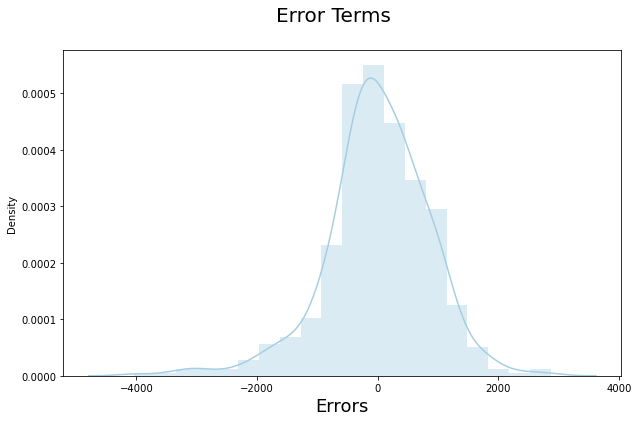

In [34]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [35]:
X_test = X_test.drop(["temp", "hum", "mnth"], axis = 1)

In [36]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [37]:
y_pred = lr_4.predict(X_test)

Text(0, 0.5, 'y_pred')

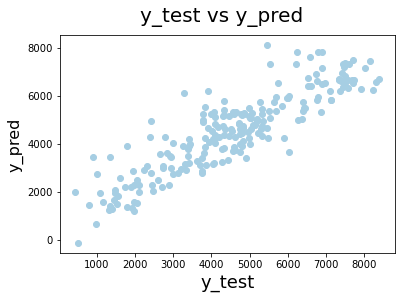

In [38]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.780006794227311